# Some insights into the ABO dataset

In [4]:
from src.abo import ABO
from pathlib import Path
from torchvision import transforms
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
root = Path("abo_dataset/images/small")
image_size = 112

dataset = ABO(
    root=root, 
    transform=transforms.Compose(
        [
            transforms.RandomResizedCrop(image_size),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
        ]
    ),)

## Classes

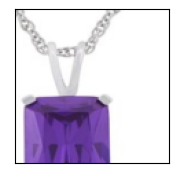

In [21]:
plt.figure(figsize=(2,2)), plt.xticks([]), plt.yticks([])
plt.imshow(dataset.__getitem__(2)[0].permute(1,2,0))
plt.show()

In [12]:
class_labels = dataset.get_labels()
class_labels_count = pd.Series(class_labels).value_counts()
class_labels_count_df = pd.DataFrame({'class_label': class_labels_count.index, 'count': class_labels_count.values})
print("Number of classes: ", len(class_labels_count_df))
print("Median number of samples per class: ", class_labels_count_df['count'].median())
print("Number of classes with more than 32 samples: ", len(class_labels_count_df[class_labels_count_df["count"]>=32]))

Number of classes:  573
Median number of samples per class:  16.0
Number of classes with more than 32 samples:  214


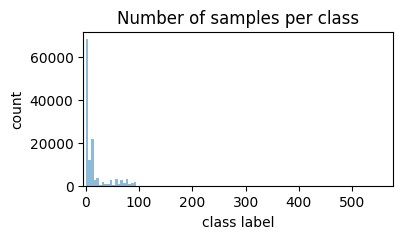

In [24]:
# fixed bin size
bins = np.arange(-100, 100, 5) # fixed bin size
plt.figure(figsize=(4,2)), plt.xlim([min(class_labels)-5, max(class_labels)+5])
plt.hist(class_labels, bins=bins, alpha=0.5)
plt.title('Number of samples per class'), plt.xlabel('class label'), plt.ylabel('count')

plt.show()

Observation:
- Classes 100 -> 600 have few number of samples
- Around a hundred of classes have huge amount of samples per class
### What are the classes with few number of samples? Are there doublon?

## Few shot batch

In [ ]:
from easyfsl.samplers import TaskSampler
from easyfsl.utils import plot_images
from torch.utils.data import DataLoader

In [ ]:
N_WAY = 5  # Number of classes in a task
N_SHOT = 5  # Number of images per class in the support set
N_QUERY = 10  # Number of images per class in the query set
N_EVALUATION_TASKS = 100

# The sampler needs a dataset with a "get_labels" method. Check the code if you have any doubt!

test_sampler = TaskSampler(
    dataset, n_way=N_WAY, n_shot=N_SHOT, n_query=N_QUERY, n_tasks=N_EVALUATION_TASKS
)

test_loader = DataLoader(
    dataset,
    batch_sampler=test_sampler,
    num_workers=12,
    pin_memory=True,
    collate_fn=test_sampler.episodic_collate_fn,
)

(
    example_support_images,
    example_support_labels,
    example_query_images,
    example_query_labels,
    example_class_ids,
) = next(iter(test_loader))

plot_images(example_support_images, "support images", images_per_row=N_SHOT)
plot_images(example_query_images, "query images", images_per_row=N_QUERY)